<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Problem 1] Learning and estimation

In [ ]:
!pip install tensorflow==1.15.0

  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Attempting uninstall: keras-applications
    Found existing installation: Keras-Applications 1.0.7
    Uninstalling Keras-Applications-1.0.7:
      Successfully uninstalled Keras-Applications-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


In [ ]:
!pip install keras==2.2.4

In [ ]:
import tensorflow

In [ ]:
tensorflow.__version__

'1.15.0'

In [ ]:
!pip install kaggle

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
!ls -a

coco_annotation.py  .kaggle	 train_bottleneck.py  yolov3-tiny.cfg
convert.py	    kmeans.py	 train.py	      yolov3.weights
darknet53.cfg	    LICENSE	 voc_annotation.py    yolov3.weights.1
font		    model_data	 yolo3		      yolov3.weights.2
.git		    __pycache__  yolo.py	      yolov3.weights.3
.gitignore	    README.md	 yolov3.cfg	      yolo_video.py


# New Section

In [ ]:

import json

token = {"username":"aminauzayisenga","key":"dfed42a6fcfcfb8d7b9bb018dffb3bfb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!pwd

/content/drive/My Drive/ObjectDetection/darknet/keras-yolo3


In [ ]:
!ls -a .kaggle

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
!cat /root/.kaggle/kaggle.json

{"username": "aminauzayisenga", "key": "dfed42a6fcfcfb8d7b9bb018dffb3bfb"}

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         86           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         83           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        843           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        146           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1659           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14455            True  
house-pr

In [ ]:
import os

os.chdir('/content/drive/My Drive/')

print(os.getcwd())

/content/drive/My Drive


In [ ]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

100% 1.08G/1.08G [00:20<00:00, 31.9MB/s]
100% 1.08G/1.08G [00:20<00:00, 56.0MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

Streaming output truncated to the last 5000 lines.
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: Simpsons/simpsons_datas

In [ ]:
!mv Simpsons/simpsons_dataset ObjectDetection/

In [ ]:
%cd ObjectDetection/

/content/drive/My Drive/ObjectDetection


In [ ]:
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20211203-130946_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

In [ ]:
!python predict.py -i kaggle_simpson_testset/kaggle_simpson_testset -c save/train_20211202-184804_config.pickle

Using TensorFlow backend.







Traceback (most recent call last):
  File "predict.py", line 246, in <module>
    main()
  File "predict.py", line 222, in main
    model_rpn, model_classifier, model_classifier_only = get_models(C)
  File "predict.py", line 65, in get_models
    model_rpn.load_weights(C.model_path, by_name=True)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/network.py", line 1163, in load_weights
    reshape=reshape)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py", line 1083, in load_weights_from_hdf5_group_by_name
    original_keras_version = f.attrs['keras_version'].decode('utf8')
AttributeError: 'str' object has no attribute 'decode'


In [ ]:
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20211203-131955_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

**[Problem 2] Code reading**
1. RPN which is defined in resnet.py, def rpn(base_layers,num_anchors)
2. Roipooling which is defined in RoiPoolingConv.py, class RoiPoolingConv(Layer)
3. Losses which are defined in losses.py, and solves the anchor box regression problem, the object classification problem, and calculates the error.
- def rpn_loss_regr(num_anchors)
- def rpn_loss_cls(num_anchors)
- def class_loss_regr(num_classes)
- def class_loss_cls(y_true, y_pred)

**[Problem 3] Estimate based on learned weights**

## Quick Start

### 1. Download YOLOv3 weights from YOLO website.

In [ ]:
!git clone https://github.com/pjreddie/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
cd darknet

/content/drive/My Drive/ObjectDetection/darknet


In [ ]:
!make

make: Nothing to be done for 'all'.


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-12-03 13:32:30--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.5’

yolov3.weights.5    100%[===================>] 236.52M  34.9MB/s    in 7.4s    

2021-12-03 13:32:38 (32.0 MB/s) - ‘yolov3.weights.5’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

/bin/bash: ./darknet: Permission denied


In [ ]:
import cv2
import matplotlib.pyplot as plt

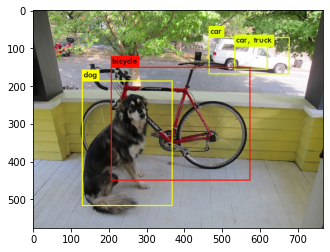

In [ ]:
img = cv2.imread("predictions.jpg")
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_)

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/dog.jpg

/bin/bash: ./darknet: Permission denied


In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights

/bin/bash: ./darknet: Permission denied


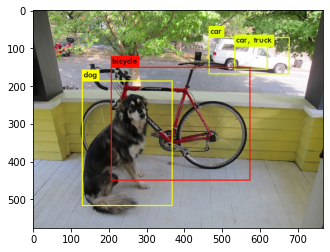

In [ ]:
img = cv2.imread("predictions.jpg")
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_)

### Tiny YOLOv3

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2021-12-03 13:34:54--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights.5’

yolov3-tiny.weights 100%[===================>]  33.79M  24.1MB/s    in 1.4s    

2021-12-03 13:34:56 (24.1 MB/s) - ‘yolov3-tiny.weights.5’ saved [35434956/35434956]



In [ ]:
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/dog.jpg

/bin/bash: ./darknet: Permission denied


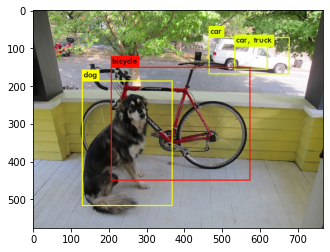

In [ ]:
img = cv2.imread("predictions.jpg")
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_)

### 2. Convert the Darknet YOLO model to a Keras model.

In [ ]:
!git clone https://github.com/qqwweee/keras-yolo3.git

fatal: destination path 'keras-yolo3' already exists and is not an empty directory.


In [ ]:
ls


backup/        LICENSE       predictions.jpg        yolov3-tiny.weights.3
cfg/           LICENSE.fuck  python/                yolov3-tiny.weights.4
darknet        LICENSE.gen   README.md              yolov3-tiny.weights.5
data/          LICENSE.gpl   results/               yolov3.weights
examples/      LICENSE.meta  scripts/               yolov3.weights.1
include/       LICENSE.mit   src/                   yolov3.weights.2
keras-yolo3/   LICENSE.v1    yolov3-tiny.weights    yolov3.weights.3
libdarknet.a   Makefile      yolov3-tiny.weights.1  yolov3.weights.4
libdarknet.so  obj/          yolov3-tiny.weights.2  yolov3.weights.5


In [ ]:
cd keras-yolo3

/content/drive/My Drive/ObjectDetection/darknet/keras-yolo3


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-12-03 13:35:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.4’

yolov3.weights.4    100%[===================>] 236.52M  34.1MB/s    in 7.3s    

2021-12-03 13:35:51 (32.6 MB/s) - ‘yolov3.weights.4’ saved [248007048/248007048]



In [ ]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-12-03 13:36:00.192841: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-03 13:36:00.200590: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-12-03 13:36:00.200911: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f4c7816a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-03 13:36:00.200947: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-12-03 13:36:00.204458: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-03 13:36:00.218057: E tenso

### 3. Run YOLO detection.

In [ ]:
!pip install Keras-Applications==1.0.7

  Using cached Keras_Applications-1.0.7-py2.py3-none-any.whl (51 kB)
  Attempting uninstall: Keras-Applications
    Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.7 which is incompatible.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


In [ ]:
!python yolo_video.py --image


Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2021-12-03 13:39:33.508704: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-03 13:39:33.514118: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-12-03 13:39:33.514509: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55bad037ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-03 13:39:33.514562: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-12-03 13:39:33.516920: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-03 13:39:33.529961: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-

In [ ]:
! python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-12-03 13:40:00.861094: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-03 13:40:00.867100: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-12-03 13:40:00.867414: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55cd6a610a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-03 13:40:00.867450: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-12-03 13:40:00.869763: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-03 13:40:00.882720: E tenso

**[Problem 4] Create a file for learning**

In [ ]:
f = open('/content/drive/MyDrive/ObjectDetection/keras-yolo3/annotation.txt', 'r', encoding='UTF-8')

In [ ]:
data = f.read()
print(data)

./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0005.jpg,115,18,498,413,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0006.jpg,171,47,423,413,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0007.jpg,120,53,381,409,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0008.jpg,149,56,398,406,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0009.jpg,205,41,470,456,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0010.jpg,71,29,265,424,abraham_grampa_simpson
./characters/abraham_grampa_simpson/pic_0011.jpg

In [ ]:
f2 = open('/content/drive/MyDrive/ObjectDetection/keras-yolo3/model_data/voc_classes.txt', 'r', encoding='UTF-8')

In [ ]:
data2 = f2.read()
print(data2)

aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor



## [Problem 5] Confirmation that learning can be performed

In [ ]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-12-03 13:43:02.997609: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-03 13:43:03.003635: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-12-03 13:43:03.003970: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561a5bd7ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-03 13:43:03.004007: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-12-03 13:43:03.008846: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-03 13:43:03.021288: E tenso

In [ ]:
!python train.py

Using TensorFlow backend.








2021-12-03 13:45:51.582889: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-03 13:45:51.588568: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-12-03 13:45:51.588830: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5577cafb2a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-03 13:45:51.588874: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-12-03 13:45:51.592052: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-03 13:45:51.604629: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-03 13:45:51.604686: I tensorflow/stream_exec